In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ea_giving_optimizer.helpers import (
    Config,
    best_giving_optuna,
    tot_give
)

plt.rcParams['figure.figsize'] = 20, 5

In [13]:
c = Config()
c.df.head()

/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,salary_k,share_tax,req_cost_k_year,leak_multiplier,years,compound_interest,salary_k_year,salary_k_year_after_tax,disposable_salary,cum_disposable_k,cum_disp_inc_return_k,cum_disp_inc_return_m,disposable_salary_w_interest
age,,,,,,,,,,,,,
30,53.0,0.272,240.0,0.95,0,1.000000,636.0,463.0,223.0,223.0,223.0,0.22,223.0
31,54.2,0.000,240.0,0.94,1,1.040000,650.4,0.0,223.0,446.0,446.0,0.45,223.0
32,55.4,0.000,240.0,0.93,2,1.081600,664.8,0.0,223.0,669.0,669.0,0.67,223.0
33,56.6,0.000,240.0,0.92,3,1.124864,679.2,0.0,223.0,892.0,892.0,0.89,223.0
34,57.8,0.000,240.0,0.91,4,1.169859,693.6,0.0,223.0,1115.0,1115.0,1.12,223.0


<AxesSubplot:xlabel='age'>

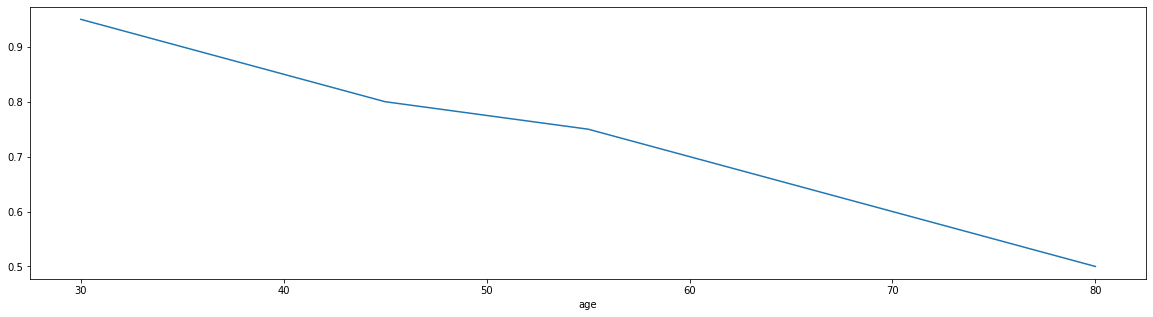

In [14]:
c.df['leak_multiplier'].plot()

In [17]:
# Get recommended giving share per age
give_share_rec = best_giving_optuna(c=c, n_trials=100)

[I 2021-12-23 16:34:08,179] A new study created in memory with name: no-name-33c06109-846c-4385-a99a-9ab9440f7c8b
/Users/simonandersson/Desktop/code/ea-giving-optimizer/ea_giving_optimizer/helpers.py:166: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/optuna/study/study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/optuna/study/study.py:856: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  self.add_trial(
[I 2021-12-23 16:34:08,187] Trial 0 finished with value: 38814.831211289 and parameters: {30: 0, 31: 0, 32: 0, 33: 0, 34: 0,

[I 2021-12-23 16:34:08,275] Trial 6 finished with value: 6950.474597412694 and parameters: {30: 0.5161297736697698, 31: 0.19711951376904335, 32: 0.7021704507974406, 33: 0.17544437678990177, 34: 0.526275117169123, 35: 0.7162930957012519, 36: 0.8648725413505095, 37: 0.15782062592116686, 38: 0.9647542686328289, 39: 0.6680052681602666, 40: 0.3643418313026331, 41: 0.48887907603240366, 42: 0.5410064541825322, 43: 0.6962294254207815, 44: 0.6755915083242563, 45: 0.7217102759526505, 46: 0.2454251026172587, 47: 0.41251887994894865, 48: 0.14502649850774574, 49: 0.7505567234485545, 50: 0.8207573568942893, 51: 0.11536995369017145, 52: 0.08647560289343204, 53: 0.42810058018005803, 54: 0.7693632831079251, 55: 0.5853599554879426, 56: 0.32106919033557935, 57: 0.6328518511126313, 58: 0.9835464022610106, 59: 0.37147918529544066, 60: 0.9480233898831177, 61: 0.24619794985658694, 62: 0.9578469416207767, 63: 0.14544758379933043, 64: 0.6429505001298155, 65: 0.034418486774629886, 66: 0.9800217272734479, 67: 0.

[I 2021-12-23 16:34:08,840] Trial 12 finished with value: 7979.783219216212 and parameters: {30: 0.0067006632292843215, 31: 0.007982849265279892, 32: 0.2924806936210285, 33: 0.02384778824632606, 34: 0.20183700279059033, 35: 0.24627859228050442, 36: 0.20679974342436272, 37: 0.7127500961808264, 38: 0.6663940913548291, 39: 0.07286350939834409, 40: 0.23842022565873583, 41: 0.4159400344011557, 42: 0.03631608685177943, 43: 0.03716288221381133, 44: 0.032354752148010965, 45: 0.1472214460744601, 46: 0.011918200504837995, 47: 0.14174766221325386, 48: 0.41849595297347564, 49: 0.18640236244070013, 50: 0.6315926709268233, 51: 0.5683166873024466, 52: 0.9970015797406773, 53: 0.23637217574101996, 54: 0.010066260193129516, 55: 0.014821627032651158, 56: 0.9911073689362911, 57: 0.006592779966977505, 58: 0.15922200101229, 59: 0.1665314406183893, 60: 0.519193496462022, 61: 0.39542144229405835, 62: 0.4859050310810198, 63: 0.051040956384195195, 64: 0.026487405089109583, 65: 0.7343003508681314, 66: 0.39561979

[I 2021-12-23 16:34:09,775] Trial 18 finished with value: 12511.594860193973 and parameters: {30: 0.8219915895610639, 31: 0.11287978128476968, 32: 0.4809467032021838, 33: 0.16890128369388796, 34: 0.1649877722956411, 35: 0.001297024737679371, 36: 0.3288657609640774, 37: 0.17512661191221196, 38: 0.392116675720121, 39: 0.4090927910955253, 40: 0.001537903829349094, 41: 0.34290810244085534, 42: 0.8086021121017037, 43: 0.8773206269797784, 44: 0.464671418326793, 45: 0.5902998317548827, 46: 0.40164684642505066, 47: 0.8363264740448992, 48: 0.26755260211563087, 49: 0.11994768624848001, 50: 0.7708438036573901, 51: 0.330590815423008, 52: 0.18688048877663171, 53: 0.9353217558356164, 54: 0.15851058078682714, 55: 0.30836146395781405, 56: 0.16588445784449887, 57: 0.007823635141861279, 58: 0.16670242861046383, 59: 0.29340807173442446, 60: 0.825986257063501, 61: 0.2564127089983934, 62: 0.03796135016132921, 63: 0.589183694743181, 64: 0.10282160897844536, 65: 0.23020346135960568, 66: 0.37382944624215, 67:

[I 2021-12-23 16:34:10,725] Trial 24 finished with value: 23179.7470384406 and parameters: {30: 0.17812724758210446, 31: 0.1049830078840549, 32: 0.08119071734025081, 33: 0.10305458233699281, 34: 0.07445122208035591, 35: 0.11943414610938806, 36: 0.0785207702819617, 37: 0.49842308282459646, 38: 0.8040150160090397, 39: 0.8926011485654151, 40: 0.14353199527332205, 41: 0.2233940098949378, 42: 0.12636328452700415, 43: 0.08850956226173116, 44: 0.26077333877346787, 45: 0.237713621353853, 46: 0.060767670487472815, 47: 0.2275253466620475, 48: 0.47369526378476406, 49: 0.0613339990925603, 50: 0.9023638929722124, 51: 0.9916332744174905, 52: 0.8597073008322872, 53: 0.32532380744363043, 54: 0.26418677332586205, 55: 0.0785166938986902, 56: 0.09974335652385612, 57: 0.21914790397991563, 58: 0.08911587109113425, 59: 0.1126146782255139, 60: 0.41879414073077037, 61: 0.13183820613314057, 62: 0.4150589010315245, 63: 0.013422076215969692, 64: 0.0018821689706833844, 65: 0.6325640125738682, 66: 0.11012782217622

[I 2021-12-23 16:34:11,725] Trial 30 finished with value: 15128.386425468885 and parameters: {30: 0.36211087988291357, 31: 0.7255757855476671, 32: 0.5752535564489814, 33: 0.002509223850388334, 34: 0.3359379855897738, 35: 0.7464547318802438, 36: 0.15905898797813828, 37: 0.002323399590780875, 38: 0.48604162402376344, 39: 0.42837581321333484, 40: 0.5055442938486406, 41: 0.058525892460585066, 42: 0.24580863483944002, 43: 0.25697126179692975, 44: 0.41599844857709384, 45: 0.07489832441399992, 46: 0.7267438846190019, 47: 0.31394587991910466, 48: 0.8073972921644058, 49: 0.3663159163737372, 50: 0.9054790996651402, 51: 0.7446404099546364, 52: 0.8999915899642094, 53: 0.541967775250521, 54: 0.8391289224632941, 55: 0.20789047569711666, 56: 0.23969638371229574, 57: 0.293160065371177, 58: 0.8633016735409798, 59: 0.9843824627608668, 60: 0.8848715720409746, 61: 0.06652998114041198, 62: 0.998750159611651, 63: 0.1951737938990728, 64: 0.3138431816292703, 65: 0.9078280656728355, 66: 0.07119096629352252, 67

[I 2021-12-23 16:34:12,700] Trial 36 finished with value: 11299.23188973998 and parameters: {30: 0.03935827024707985, 31: 0.5740731925417115, 32: 0.3223458477142469, 33: 0.14305820970570288, 34: 0.3815098915368797, 35: 0.8007042412146683, 36: 0.11891201281214267, 37: 0.42385532560099143, 38: 0.9893351865612823, 39: 0.808396185791605, 40: 0.05733789060416061, 41: 0.20510993015723733, 42: 0.002796586170702493, 43: 0.368346924811504, 44: 0.2163545281557544, 45: 0.3154638769277483, 46: 0.8514666488023884, 47: 0.2895983572001153, 48: 0.5800956751967221, 49: 0.7897937472705729, 50: 0.4689282289977229, 51: 0.5856334478547737, 52: 0.5953810141370034, 53: 0.4739224796019244, 54: 0.8507483090566658, 55: 0.06729040152567942, 56: 0.7194055886586357, 57: 0.0537184087055209, 58: 0.7555929461766822, 59: 0.06290553083402703, 60: 0.10020365727499114, 61: 0.0019540934668691133, 62: 0.1426800713990124, 63: 0.18835788157381733, 64: 0.25744787698106825, 65: 0.5620367357926165, 66: 0.19976642706267494, 67: 

[I 2021-12-23 16:34:13,714] Trial 42 finished with value: 30009.377639619717 and parameters: {30: 0.05212038479728151, 31: 0.9953503307073212, 32: 0.4018132183357881, 33: 0.10373876865398189, 34: 0.14173625311643584, 35: 0.7751804365405556, 36: 0.09834959789991152, 37: 0.4488109963478319, 38: 0.7620949876258689, 39: 0.6445655870383564, 40: 0.025912744401471594, 41: 0.06138823191349835, 42: 0.26450077513169906, 43: 0.47125068423776245, 44: 0.07678367236937617, 45: 0.0597623753839473, 46: 0.9367159952854152, 47: 0.004924747238839108, 48: 0.6561220468897775, 49: 0.28423789632292074, 50: 0.9244629169172485, 51: 0.6142399436432521, 52: 0.8414651151783553, 53: 0.4289577557915721, 54: 0.35693347466362213, 55: 0.27765152755719896, 56: 0.0021669733957854174, 57: 0.06431447716659901, 58: 0.784431564640754, 59: 0.17639162289862514, 60: 0.766049017757202, 61: 0.1306133832422483, 62: 0.7655963852521956, 63: 0.15366915223606742, 64: 0.12430219646905967, 65: 0.4464099138671273, 66: 0.3392105281100908

[I 2021-12-23 16:34:14,859] Trial 48 finished with value: 10687.989712250785 and parameters: {30: 0.004769879746464201, 31: 0.42286087083087764, 32: 0.399449069516629, 33: 0.2653727635758759, 34: 0.35935405959983424, 35: 0.8628425590862423, 36: 0.3628893982792717, 37: 0.39235528612078774, 38: 0.6054944536146665, 39: 0.7336790804917971, 40: 0.10444278219479983, 41: 0.05084884826228134, 42: 0.16343233973409887, 43: 0.2926863924458622, 44: 0.14846256341215033, 45: 0.35625788590372065, 46: 0.6743508746634455, 47: 0.11577501022270442, 48: 0.5522411039614313, 49: 0.3198313559271427, 50: 0.4035869641860287, 51: 0.19715914143069235, 52: 0.3551553048456077, 53: 0.2671840297050732, 54: 0.5007592432432106, 55: 0.712133191127133, 56: 0.21294173582927056, 57: 0.09074934551631106, 58: 0.7868530409526453, 59: 0.8542491341250394, 60: 0.05444305340327251, 61: 0.04258801604514923, 62: 0.8452075311528044, 63: 0.5487025734067329, 64: 0.13659349031948925, 65: 0.25881687408180526, 66: 0.941599096607806, 67:

[I 2021-12-23 16:34:15,881] Trial 54 finished with value: 27502.560094063214 and parameters: {30: 0.09032039847018397, 31: 0.6116351001411962, 32: 0.25676594111846196, 33: 0.04368538648819089, 34: 0.15447953275610488, 35: 0.8281572269970282, 36: 0.18811509274166757, 37: 0.8456351296529714, 38: 0.7816131169087317, 39: 0.854935598588064, 40: 0.16934578821079116, 41: 0.1220790500580023, 42: 0.30222485780403147, 43: 0.09792536701809476, 44: 0.3898037957174968, 45: 0.21825962542223662, 46: 0.7765762404192103, 47: 0.14022214949768405, 48: 0.8440572165012813, 49: 0.42588050601650707, 50: 0.027466405091186974, 51: 0.5699615179290859, 52: 0.7673574712589536, 53: 0.02116631080294895, 54: 0.4828170802749391, 55: 0.20798622405354364, 56: 0.15260509452058896, 57: 0.07822038554043646, 58: 0.9482414893887646, 59: 0.040976384430876374, 60: 0.7384235494237041, 61: 0.15359710939524404, 62: 0.8770768301003364, 63: 0.1343867653759002, 64: 0.16447279421560795, 65: 0.47469528665584426, 66: 0.169786664758105

[I 2021-12-23 16:34:16,932] Trial 60 finished with value: 27321.612130021676 and parameters: {30: 0.07413126880885294, 31: 0.1499254138674631, 32: 0.20257430780036081, 33: 0.08415204732137313, 34: 0.07337461462150763, 35: 0.229934217338422, 36: 0.22936250876135308, 37: 0.5713041252107505, 38: 0.580654456474404, 39: 0.1242092094915519, 40: 0.11368716059627765, 41: 0.3573995234103184, 42: 0.10006706316186939, 43: 0.3667353926179566, 44: 0.15404982901915643, 45: 0.13769073048256186, 46: 0.7229783797034156, 47: 0.9021924431851858, 48: 0.4411171606017181, 49: 0.28890638842703337, 50: 0.8743548891734577, 51: 0.5013390450954869, 52: 0.23986261968808711, 53: 0.34957939172189234, 54: 0.3967432296315127, 55: 0.21540052315136438, 56: 0.6446594478450858, 57: 0.14079995993556838, 58: 0.5369867296225413, 59: 0.04057077504227716, 60: 0.8324702867317435, 61: 0.033218702299120786, 62: 0.8244554818937044, 63: 0.3756103331632662, 64: 0.08055571704850989, 65: 0.0482684606292228, 66: 0.1236578376212273, 67

[I 2021-12-23 16:34:18,010] Trial 66 finished with value: 17142.73844383222 and parameters: {30: 0.10530021030924122, 31: 0.04233804406818726, 32: 0.4458812258102998, 33: 0.002296614301921851, 34: 0.3095105359462684, 35: 0.9134572051639352, 36: 0.10108141668421244, 37: 0.7123215768294604, 38: 0.7285916186035866, 39: 0.8852376358134932, 40: 0.25043701874638113, 41: 0.11975642265605432, 42: 0.5168958493583178, 43: 0.08639785348242965, 44: 0.18789302550345466, 45: 0.05320606912813243, 46: 0.8666417990857928, 47: 0.2378346209820747, 48: 0.8620783364293945, 49: 0.45060076717300723, 50: 0.5160836712774501, 51: 0.5663370437746944, 52: 0.9604882003686631, 53: 0.14822974425098073, 54: 0.3767603980512443, 55: 0.10295973141123924, 56: 0.18690936752292692, 57: 0.11091625369260241, 58: 0.7090716442346179, 59: 0.18118046093028856, 60: 0.786992721312928, 61: 0.6474639543661042, 62: 0.5017636771470271, 63: 0.6560406707818613, 64: 0.31482616818960907, 65: 0.3653867046499738, 66: 0.14531374695568378, 67

[I 2021-12-23 16:34:19,075] Trial 72 finished with value: 33473.07570525949 and parameters: {30: 0.061631689892534, 31: 0.8540852632109692, 32: 0.1615907437687147, 33: 0.0872213562349446, 34: 0.2476283165001589, 35: 0.8262951545666243, 36: 0.03438902620985278, 37: 0.4821360581273954, 38: 0.6498960248914497, 39: 0.6350026241936729, 40: 0.36542223172520844, 41: 0.13616874897734188, 42: 0.389833027323472, 43: 0.08360745516372226, 44: 0.24558320441176906, 45: 0.13422774523435235, 46: 0.7982259944732899, 47: 0.20852371771166156, 48: 0.999303903319666, 49: 0.3377215272389772, 50: 0.9775718718499752, 51: 0.47721092069299387, 52: 0.9135274450076588, 53: 0.037691024008568955, 54: 0.2863396660208297, 55: 0.2112005084944556, 56: 0.02695310043457841, 57: 0.1685796641979132, 58: 0.924181436431484, 59: 0.09824747228360733, 60: 0.8248092625217867, 61: 0.4314139867763613, 62: 0.6896409497282742, 63: 0.08266391172247922, 64: 0.14217830336884807, 65: 0.26418606234771486, 66: 0.17363589095584178, 67: 0.3

[I 2021-12-23 16:34:20,087] Trial 78 finished with value: 36291.51244355682 and parameters: {30: 0.16271506642218983, 31: 0.5094453802508041, 32: 0.32313579091489014, 33: 0.2913338874904585, 34: 0.34304164945648297, 35: 0.6408026023216224, 36: 0.1474754061345729, 37: 0.32851856063334184, 38: 0.9115760813273882, 39: 0.809217338371024, 40: 0.04325719334105246, 41: 0.07164538454128153, 42: 0.32431271847415916, 43: 0.1862476600102608, 44: 0.419751009606395, 45: 0.5691448969707387, 46: 0.9630241291719166, 47: 0.027163345649348268, 48: 0.7028743805124651, 49: 0.47554845194605244, 50: 0.9514144299147451, 51: 0.05354018133378896, 52: 0.3852733365184512, 53: 0.41202191482268613, 54: 0.6468397275887051, 55: 0.2586644410731346, 56: 0.059018725656112075, 57: 0.9044021425293606, 58: 0.05349920671301306, 59: 0.4171415369126367, 60: 0.7659102997914985, 61: 0.009595993854503087, 62: 0.7266143524391365, 63: 0.06979579922326304, 64: 0.4239939291049898, 65: 0.3392453100422485, 66: 0.1486654778419336, 67:

[I 2021-12-23 16:34:21,132] Trial 84 finished with value: 42427.5590465818 and parameters: {30: 0.8938825363118457, 31: 0.41500711330565265, 32: 0.5614117733811933, 33: 0.4846130707367784, 34: 0.5264866612359372, 35: 0.9845025875209961, 36: 0.19875363341044278, 37: 0.270890707691924, 38: 0.9932359222648122, 39: 0.9083540519991782, 40: 0.1345414660060253, 41: 0.8695893007234233, 42: 0.023380485416347806, 43: 0.3543205313863327, 44: 0.408896906387271, 45: 0.6203303063137934, 46: 0.9705935711747211, 47: 0.054335206978782025, 48: 0.6407171277791415, 49: 0.6546146998347951, 50: 0.9349834811895589, 51: 0.12483324973742295, 52: 0.4624216711562251, 53: 0.5152310524288156, 54: 0.757772917844934, 55: 0.35135016149233705, 56: 0.06637231184540576, 57: 0.9858923848690588, 58: 0.04548740951254794, 59: 0.6659521314842256, 60: 0.7109942998870927, 61: 0.11301276104811929, 62: 0.6277686143029269, 63: 0.06115733805652389, 64: 0.5361950325629995, 65: 0.6432916228945755, 66: 0.09007731593060411, 67: 0.0654

[I 2021-12-23 16:34:22,147] Trial 90 finished with value: 35393.50546710054 and parameters: {30: 0.7825094444424563, 31: 0.34062391582762575, 32: 0.6536712501508848, 33: 0.5369165268907257, 34: 0.5385802868657606, 35: 0.9031890997795261, 36: 0.18164660949211292, 37: 0.21352974541633885, 38: 0.9389997343787041, 39: 0.9659082188643076, 40: 0.010401632726872778, 41: 0.9405244643148697, 42: 0.006362882404819428, 43: 0.4441627942436366, 44: 0.3911557189778405, 45: 0.6663795014164582, 46: 0.9468050035612376, 47: 0.09865469169424748, 48: 0.6059603631017179, 49: 0.9963598209397271, 50: 0.9741430801963413, 51: 0.17275614121181954, 52: 0.42165731771910303, 53: 0.37609343208307605, 54: 0.6919440760158756, 55: 0.33913035020825344, 56: 0.5874363908097856, 57: 0.9532354200679078, 58: 0.07717524802959169, 59: 0.5054713182135606, 60: 0.7073238835295191, 61: 0.8893872157413804, 62: 0.4955477198919966, 63: 0.03598187199536987, 64: 0.5157997524917578, 65: 0.677542751074201, 66: 0.09842931583298747, 67: 0

[I 2021-12-23 16:34:23,174] Trial 96 finished with value: 35005.64479736556 and parameters: {30: 0.857992903236371, 31: 0.4889363989268501, 32: 0.4767481216882383, 33: 0.6192756422556674, 34: 0.688488160937151, 35: 0.9190988664158779, 36: 0.2410668557278655, 37: 0.3566949873070628, 38: 0.8889569260588449, 39: 0.9610994919226722, 40: 0.024039328527083736, 41: 0.650170045199578, 42: 0.03822514500752844, 43: 0.46736003202063525, 44: 0.38047711600112616, 45: 0.5700017686611552, 46: 0.9076071379518293, 47: 0.07307142693768498, 48: 0.6818947650989244, 49: 0.9004449757874806, 50: 0.9517304901531662, 51: 0.06822306309662964, 52: 0.39834567327678233, 53: 0.4855154707167161, 54: 0.8547053363018104, 55: 0.4568957756579992, 56: 0.43383644733194343, 57: 0.7621112553313014, 58: 0.06852707008107767, 59: 0.6065833304166978, 60: 0.6445692958672725, 61: 0.12135277402549521, 62: 0.589334603599931, 63: 0.01970826696115104, 64: 0.6686640795663775, 65: 0.6479479843916501, 66: 0.058091112081110154, 67: 0.106

In [18]:
# Write into col of df
c.df['give_share'] = pd.Series(give_share_rec)

# Get absolute number result by applying tot_give recursively
res = {}
disp = c.df['disposable_salary'].to_dict()
for i in give_share_rec.keys():
    give_share_i = pd.Series(give_share_rec).loc[min(give_share_rec.keys()):i].to_dict()
    res[i] = tot_give(disp, give_share_i, r=c.return_after_inflation)
    
# Map recommended cumulative giving into df
c.df['give_rec_cum'] = pd.Series(res)

<AxesSubplot:xlabel='age'>

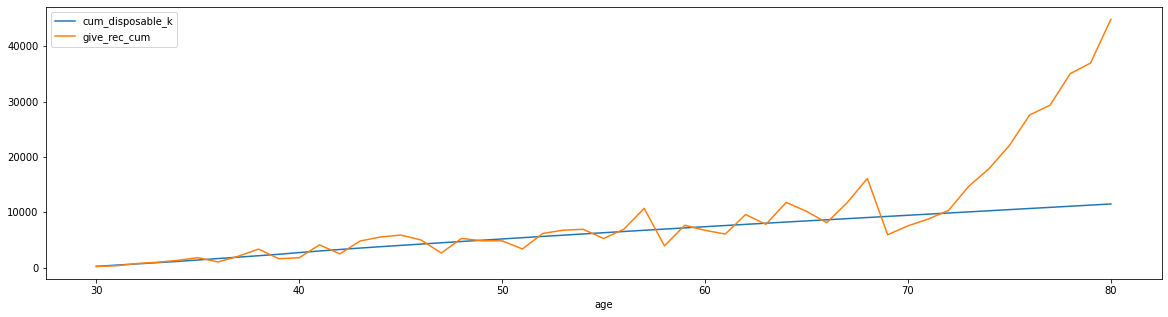

In [19]:
c.df[['cum_disposable_k', 'give_rec_cum']].plot()

In [20]:
c.df[['disposable_salary_w_interest', 'give_rec_cum']].sum()

disposable_salary_w_interest     34306.000000
give_rec_cum                    467336.912464
dtype: float64